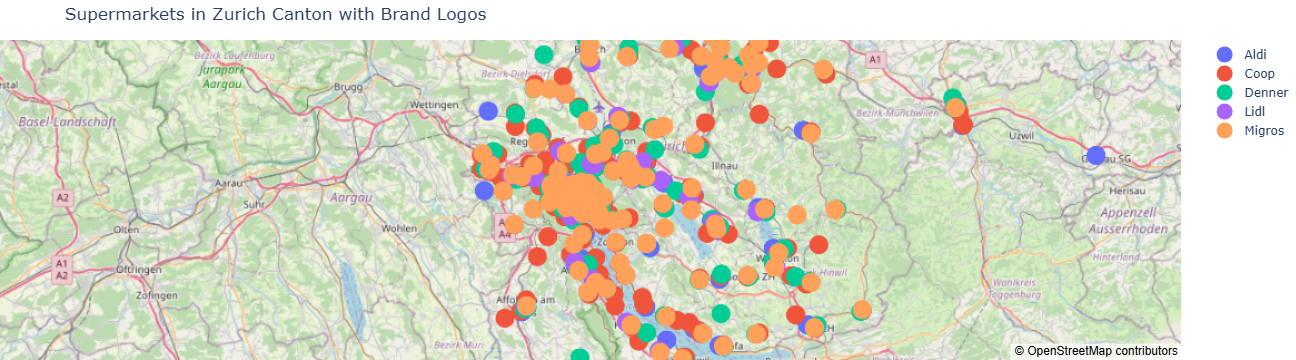

In [19]:
import pandas as pd
import base64
import plotly.graph_objects as go
from PIL import Image
import io

# Load data
df = pd.read_csv('supermarkets_with_district.csv')

# Create figure
fig = go.Figure()

# Add one trace per brand
for brand, group in df.groupby('type'):
    fig.add_trace(go.Scattermapbox(
        lat=group['lat'],
        lon=group['lng'],
        mode='markers',
        marker=go.scattermapbox.Marker(size=20),
        text=group['name'],
        name=brand,
        hoverinfo='text'
    ))

# Layout
fig.update_layout(
    mapbox=dict(
        style="open-street-map",
        zoom=9,
        center={"lat": 47.3769, "lon": 8.5417}
    ),
    title="Supermarkets in Zurich Canton with Brand Logos",
    height=700,
    margin={"r":0,"t":40,"l":0,"b":0}
)

fig.show()


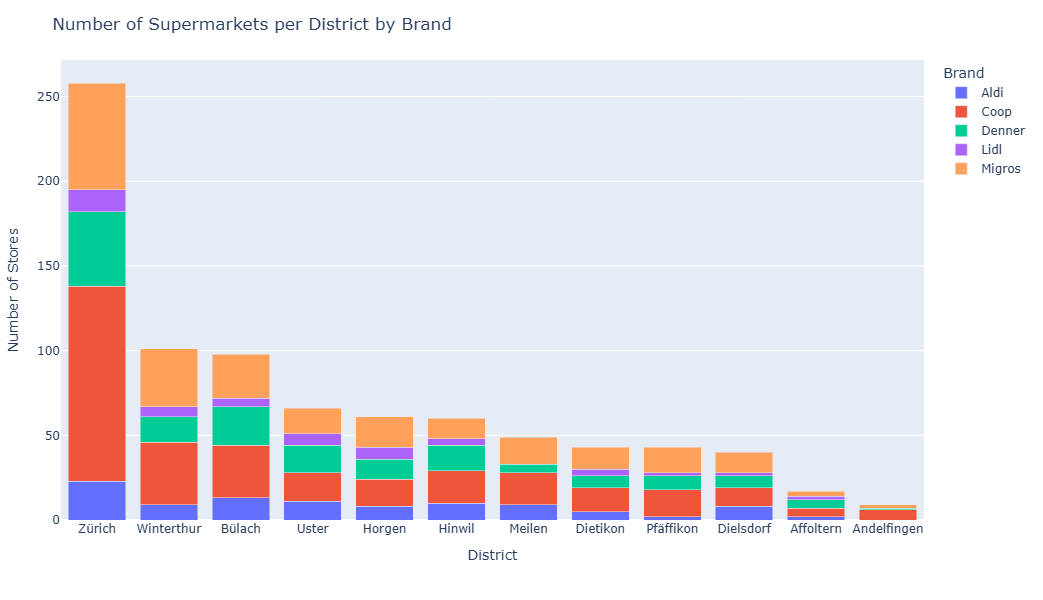

In [23]:
import pandas as pd
import plotly.express as px

# Load the verified data
df = pd.read_csv('supermarkets_with_district.csv')

# Group by District and type
grouped = df.groupby(['district', 'type']).size().reset_index(name='count')

# Create a stacked bar chart
fig = px.bar(
    grouped,
    x='district',
    y='count',
    color='type',
    title='Number of Supermarkets per District by Brand',
    labels={'count': 'Store Count', 'type': 'Brand'},
    height=600
)

# Optional layout tweaks
fig.update_layout(
    xaxis_title='District',
    yaxis_title='Number of Stores',
    barmode='stack',
    xaxis={'categoryorder': 'total descending'},
    margin=dict(t=60, l=40, r=40, b=80)
)

fig.show()


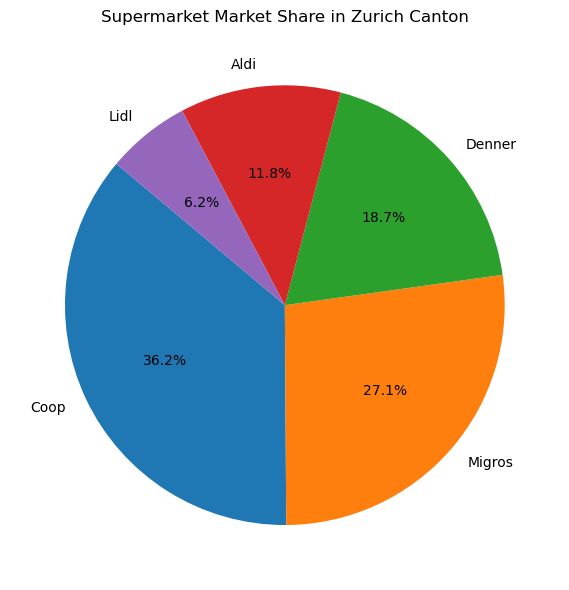

In [24]:
df['type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, figsize=(6, 6))
plt.title('Supermarket Market Share in Zurich Canton')
plt.ylabel('')
plt.tight_layout()
plt.show()



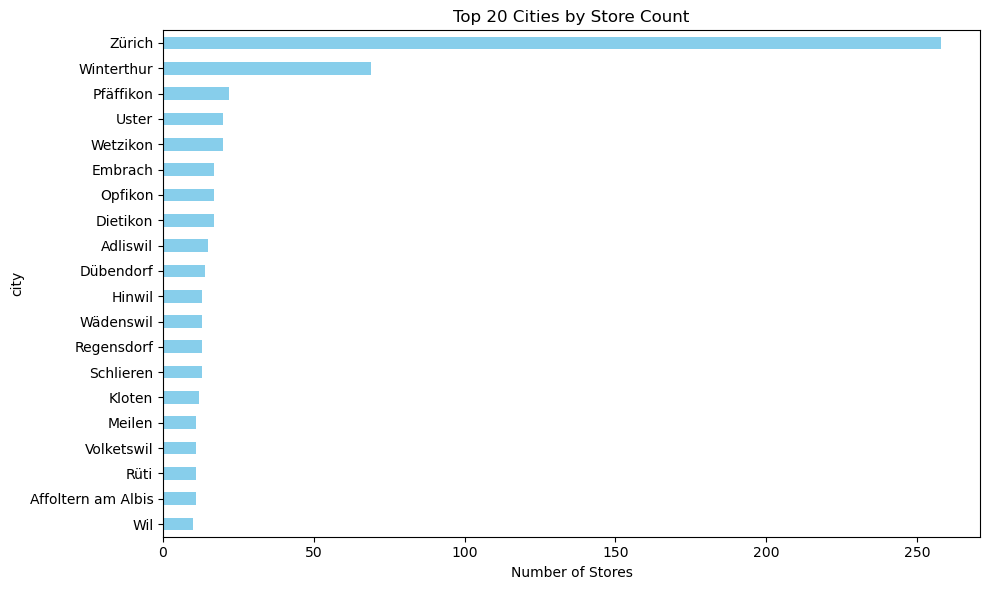

In [25]:
df['city'].value_counts().head(20).plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.title('Top 20 Cities by Store Count')
plt.xlabel('Number of Stores')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


# SPAR Store Count by District

In [28]:
import pandas as pd

# Load cleaned verified data
df = pd.read_csv('supermarkets_with_district.csv')

# Filter only SPAR stores
df_spar = df[df['type'].str.lower() == 'spar']

# Count SPAR stores per district
spar_by_district = df_spar['district'].value_counts().reset_index()
spar_by_district.columns = ['district', 'SPAR_Store_Count']

# Sort and show top
spar_by_district = spar_by_district.sort_values(by='SPAR_Store_Count', ascending=False)
print(spar_by_district)

Empty DataFrame
Columns: [district, SPAR_Store_Count]
Index: []


# 📊 SPAR vs Competitors in Zurich Canton

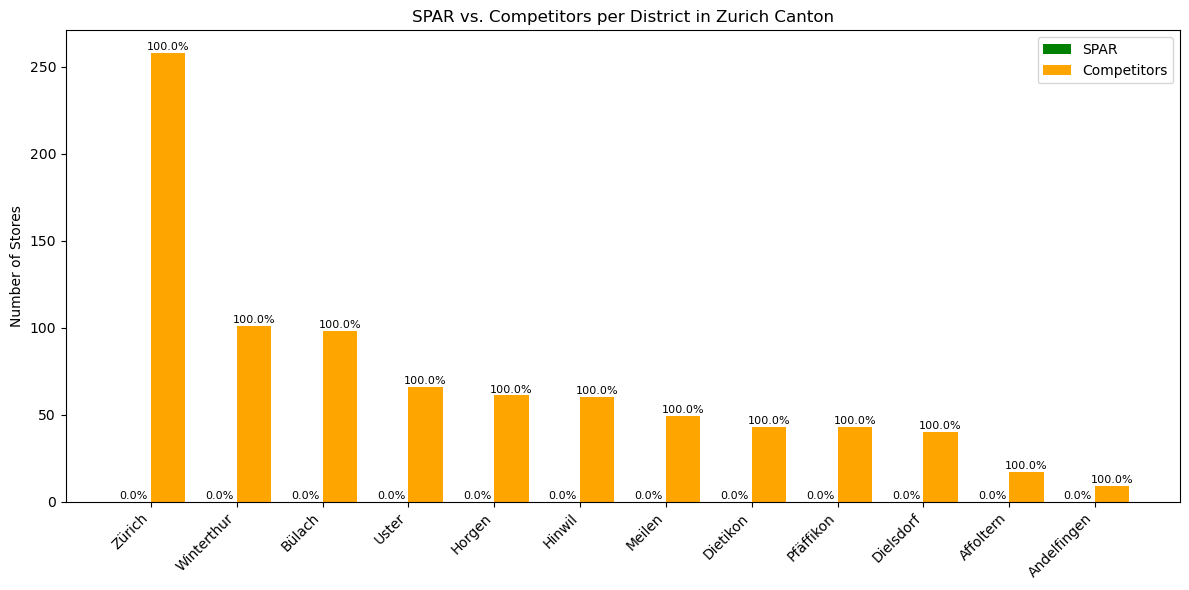

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('supermarkets_with_district.csv')
df['type'] = df['type'].str.strip().str.lower()

# Group by District and type
counts = df.groupby(['district', 'type']).size().unstack(fill_value=0).reset_index()

# Separate SPAR and Competitors
counts['SPAR'] = counts.get('spar', 0)
counts['Competitors'] = counts.drop(columns=['district', 'spar'], errors='ignore').sum(axis=1)
counts['Total'] = counts['SPAR'] + counts['Competitors']

# Calculate percentages
counts['SPAR_pct'] = counts['SPAR'] / counts['Total'] * 100
counts['Competitors_pct'] = counts['Competitors'] / counts['Total'] * 100

# Sort by Competitors
counts = counts.sort_values(by='Competitors', ascending=False).reset_index(drop=True)

# Plotting
plt.figure(figsize=(12, 6))
bar_width = 0.4
x = range(len(counts))

bars1 = plt.bar(x, counts['SPAR'], width=bar_width, label='SPAR', color='green')
bars2 = plt.bar([i + bar_width for i in x], counts['Competitors'], width=bar_width, label='Competitors', color='orange')

# Add percentage labels
for i, (b1, b2) in enumerate(zip(bars1, bars2)):
    plt.text(b1.get_x() + b1.get_width() / 2, b1.get_height() + 0.5,
             f"{counts.loc[i, 'SPAR_pct']:.1f}%", ha='center', va='bottom', fontsize=8)
    plt.text(b2.get_x() + b2.get_width() / 2, b2.get_height() + 0.5,
             f"{counts.loc[i, 'Competitors_pct']:.1f}%", ha='center', va='bottom', fontsize=8)

# Labels and layout
plt.xticks([i + bar_width / 2 for i in x], counts['district'], rotation=45, ha='right')
plt.ylabel('Number of Stores')
plt.title('SPAR vs. Competitors per District in Zurich Canton')
plt.legend()
plt.tight_layout()
plt.show()


# Competitor Count per District

       district  Competitor_Count
11  Andelfingen                 9
10    Affoltern                17
9     Dielsdorf                40
7     Pfäffikon                43
8      Dietikon                43
6        Meilen                49
5        Hinwil                60
4        Horgen                61
3         Uster                66
2        Bülach                98
1    Winterthur               101
0        Zürich               258


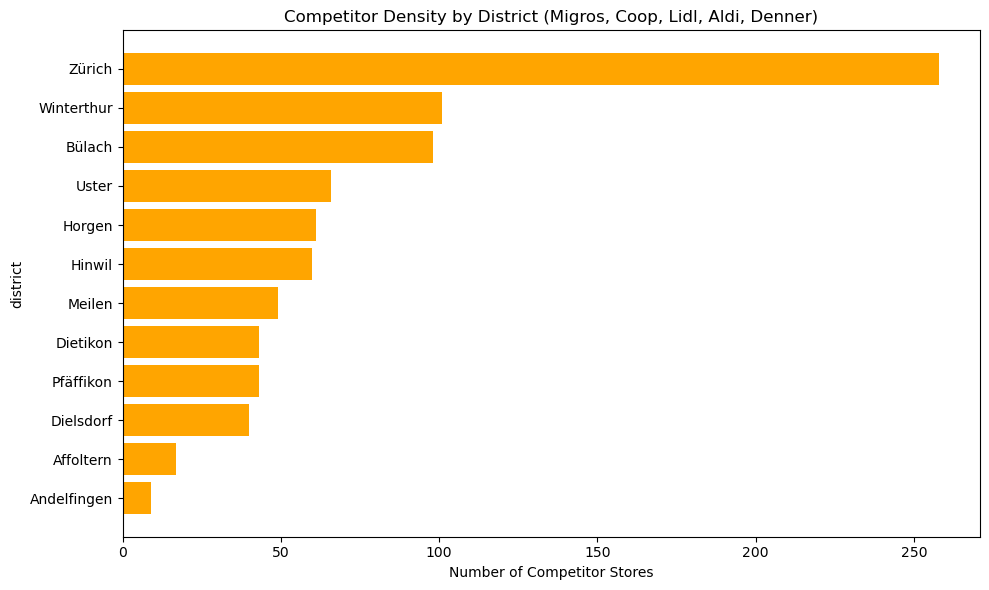

In [30]:
import pandas as pd

# Load dataset
df = pd.read_csv('supermarkets_with_district.csv')
df['type'] = df['type'].str.strip().str.lower()

# Define competitor list (excluding SPAR)
competitors = ['migros', 'coop', 'lidl', 'aldi', 'denner']

# Filter for competitors only
df_competitors = df[df['type'].isin(competitors)]

# Count competitors per district
competitor_counts = df_competitors['district'].value_counts().reset_index()
competitor_counts.columns = ['district', 'Competitor_Count']

# Optional: sort to spot low competition areas
competitor_counts = competitor_counts.sort_values(by='Competitor_Count')
print(competitor_counts)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(competitor_counts['district'], competitor_counts['Competitor_Count'], color='orange')
plt.title('Competitor Density by District (Migros, Coop, Lidl, Aldi, Denner)')
plt.xlabel('Number of Competitor Stores')
plt.ylabel('district')
plt.tight_layout()
plt.show()

In [32]:
# Load the population data
pop_df = pd.read_csv("KTZH_area_forecast.csv")

# Rename columns (as you planned earlier)
pop_df.rename(columns={
    'bezirk': 'district', 'daten': 'data type', 'jahr': 'year',
    'geschlecht': 'gender', 'alter': 'age group', 'anzahl': 'number'
}, inplace=True)

# Get the latest year
latest_year = pop_df['year'].max()

# Filter to total population (ignore gender/age breakdown for now)
latest_pop = pop_df[(pop_df['year'] == latest_year) & (pop_df['data type'] == 'Bevölkerung')]

# Group by district
pop_by_district = latest_pop.groupby('district')['number'].sum().reset_index()
pop_by_district.columns = ['district', 'population']
pop_by_district


,district,population


In [33]:
# Load the supermarkets dataset (if not already loaded)
super_df = pd.read_csv("supermarkets_with_district.csv")

# Count supermarkets per district
super_count = super_df['district'].value_counts().reset_index()
super_count.columns = ['district', 'supermarket_count']

# Merge population and supermarket count
merged_df = pop_by_district.merge(super_count, on='district', how='left')

# Fill missing supermarket counts with 0 (if any districts have no stores)
merged_df['supermarket_count'] = merged_df['supermarket_count'].fillna(0).astype(int)

# Calculate population per supermarket
merged_df['people_per_store'] = merged_df['population'] / merged_df['supermarket_count'].replace(0, float('nan'))

# Sort by people per store (highest = most underserved)
merged_df.sort_values('people_per_store', ascending=False, inplace=True)

# Show the result
merged_df


,district,population,supermarket_count,people_per_store


In [34]:
print("Districts in population data:")
print(pop_by_district['district'].unique())

print("\nDistricts in supermarket data:")
print(super_count['district'].unique())


Districts in population data:
[]

Districts in supermarket data:
['Zürich' 'Winterthur' 'Bülach' 'Uster' 'Horgen' 'Hinwil' 'Meilen'
 'Pfäffikon' 'Dietikon' 'Dielsdorf' 'Affoltern' 'Andelfingen']
